In [259]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

## <i><u> P1 (a): Radius of circles made by doublet </u></i>

<p>
Consider a doublet of strength $\kappa$, with a source and sink superimposed on each other, placed in a uniform flow of velocity $u_{\infty}$. For the sake of simplicity, let's assume the doublet to be located at $\left ( 0,0 \right)$.

<p>
The streamfunction, $\psi$, can be expressed as:

\begin{equation*}
\psi(r,\theta) = u_{\infty} r\sin \theta - \frac{\kappa}{2 \pi} \left( \frac{\sin\theta}{r} \right)
\end{equation*}

where $r$ is the radial distance from the doublet. In a Cartesian coordinate system, the above equation can be rewritten as:

\begin{equation*}
\psi(x,y) = u_{\infty} y - \frac{\kappa}{2 \pi} \left( \frac{y}{x^2+y^2} \right)
\end{equation*}

Setting $a^2 = \frac{\kappa}{2 \pi u_{\infty}}$:

\begin{equation*}
\psi(x,y) = u_{\infty} y \left( 1 - \frac{a^2}{x^2+y^2} \right)
\end{equation*}

For constant $\psi = 0$ (dividing streamline):
\begin{equation*}
u_{\infty} y \left( 1 - \frac{a^2}{x^2+y^2} \right) = 0
\end{equation*}

The roots of the above equation are:

\begin{equation*}
x^2+y^2 = a^2
\end{equation*}
\begin{equation*}
y = 0
\end{equation*}

The first root represents a circle of radius $\sqrt[]\frac{\kappa}{2 \pi u_{\infty}}$ and centerd about $\left( 0, 0\right)$.

<hr>

## <i><u> P1 (b): Unit cirle in uniform flow </u></i>

In [263]:
#Define grid parameters

N = 100
Xmin = -2.0; Xmax = 2.0
Ymin = -2.0; Ymax = 2.0

x = numpy.linspace(Xmin, Xmax, N);
y = numpy.linspace(Ymin, Ymax, N);

dx = x[1]-x[0]; dy = y[1]-y[0];

X, Y = numpy.meshgrid(x, y)

#Define flow parameters

kappa = 1.0;               #Source strength
x_doublet, y_doublet = 0.0, 0.0

uinf = 1.0

In [264]:
# Define function to return velocity components
def get_velo(strength, xd, yd, X, Y):
    
    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u, v

# Define function to return streamfunction:
def get_streamfunction(strength, xd, yd, X, Y):
    
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi

In [266]:
#Get velocities and streamfunctions:
u_doublet, v_doublet = get_velo(kappa, x_doublet, y_doublet, X, Y)
psi_doublet = get_streamfunction(kappa, x_doublet, y_doublet, X, Y)

u = u_doublet + uinf; v = v_doublet
psi = psi_doublet + uinf*Y

In [267]:
#Find y-coordinate of dividing streamline along X = 0
ind_mid = int(N/2)-1; psi_min = 1.0E10

for j in range (N):
    if (Y[j,ind_mid] > 0.0):
        if (abs(psi[j,ind_mid]) < psi_min):
            psi_min = abs(psi[j,ind_mid]);
            loc_psimin = j
            
print('At x = 0, min psi:', psi_min, 'at y:', Y[loc_psimin,ind_mid])
print('Radius of circle from formula:', math.sqrt(kappa/2/math.pi/uinf))

At x = 0, min psi: 0.0296567100233 at y: 0.383838383838
Radius of circle from formula: 0.3989422804014327


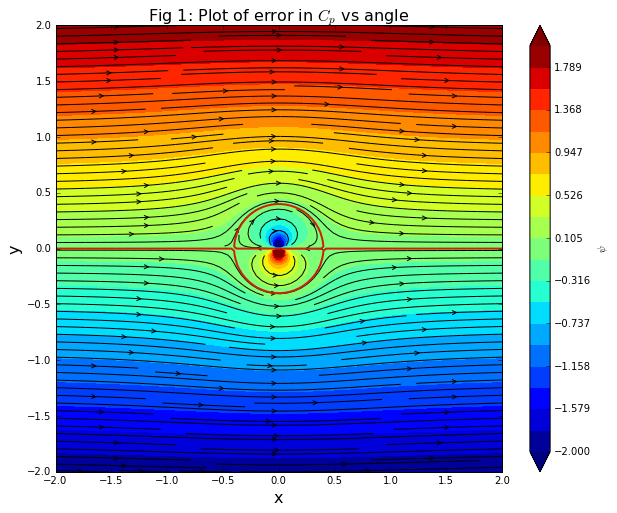

In [268]:
size = 8
pyplot.figure(figsize=(size + 2, (Ymax-Ymin)/(Xmax-Xmin)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(Xmin, Xmax)
pyplot.ylim(Ymin, Ymax)
pyplot.contourf(X,Y,psi, levels = numpy.linspace(-2,2,20), extend='both')
pyplot.colorbar(label = '$\psi$')
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, color ='#000000', arrowsize=1, arrowstyle='->')
pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.title('Fig 1: Plot of error in $C_{p}$ vs angle', fontsize=16);

The difference in the two values can be attributed to discretization errors. By increasing the number of degrees of freedom along each axis, one can reduce this error.

<hr>

## <i><u> P2 (a): Coefficient of pressure along the surface of circle </u></i>

Consider the flow past a circle in polar coordinates. The velocity components are given as:

\begin{equation*}
u_{r} = u_{\infty} \cos \theta \left( 1 - \frac{a^2}{r^2} \right)
\end{equation*}

\begin{equation*}
u_{\theta} = - u_{\infty} \sin \theta \left( 1 + \frac{a^2}{r^2} \right)
\end{equation*}

At the circle which defines the dividing streamline, the flow is divided into two regions, with no flow entering or leaving either region. Thus, flow is tangential to the streamline. The velocity components reduce to:

\begin{equation*}
u_{r} = 0
\end{equation*}

\begin{equation*}
u_{\theta} = -2 u_{\infty} \sin \theta
\end{equation*}

Therefore, the total velocity magnitude, V:

\begin{equation*}
V^2 = 4 u_{\infty}^2 \sin ^2 \theta
\end{equation*}

Using Bernoulli's principle between a point on the circle $(p,V)$ and another in the far field $(p_{\infty}, u_{\infty})$:

\begin{equation*}
p_{\infty} + \frac{1}{2} \rho u_{\infty}^2 = p + \frac{1}{2} \rho V^2
\end{equation*}

\begin{equation*}
\Rightarrow p_{\infty} + \frac{1}{2} \rho u_{\infty}^2 = p + \frac{1}{2} \rho \left( 4 u_{\infty}^2 \sin ^2 \theta \right)
\end{equation*}

\begin{equation*}
\Rightarrow p - p_{\infty} = \frac{1}{2} \rho u_{\infty}^2 \left(1 - 4 \sin ^2 \theta \right)
\end{equation*}

The Coefficient of pressure, $C_{p}$, is defined as:

\begin{equation*}
\Rightarrow C_{p} = \left( \frac{p - p_{\infty}}{\frac{1}{2} \rho u_{\infty}^2} \right) =  1 - 4 \sin ^2 \theta
\end{equation*}

<hr>

## <i><u> P2 (b): Coefficient of pressure in polar coordinates </u></i>

In [269]:
# Define polar grid
ngrad = 100; ngtheta = 50

azimuth = numpy.radians(numpy.linspace(-180,180,ngtheta));
rad = numpy.linspace(0,2,ngrad);

r, theta = numpy.meshgrid(rad, azimuth)

In [270]:
#Define velocity components

a2 = kappa/uinf/2.0/math.pi

ur = numpy.zeros_like(r); ut = numpy.zeros_like(r); psi = numpy.zeros_like(r)

for irad in range(ngrad):
    for itheta in range (ngtheta):
        if (r[itheta,irad] != 0.0):
            ur[itheta,irad] =  uinf*numpy.cos(theta[itheta,irad])*(1.0 - a2/r[itheta,irad]**2)
            ut[itheta,irad] = -uinf*numpy.sin(theta[itheta,irad])*(1.0 + a2/r[itheta,irad]**2)
            psi[itheta,irad] = uinf*r[itheta,irad]*numpy.sin(theta[itheta,irad]) - \
                               kappa/2.0/math.pi*numpy.sin(theta[itheta,irad])/r[itheta,irad]
            #print(r[itheta,irad], theta[itheta,irad], abs(psi[itheta,irad]))
            
i_test = 25; psi_min = 1.0E10
for irad in range (ngrad):
    if (abs(psi[i_test,irad]) < psi_min and r[i_test,irad] != 0.0):
        loc_min = irad; psi_min = abs(psi[i_test,irad])

velo = numpy.sqrt(ur**2 + ut**2)

Cp = 1.0 - velo**2/uinf**2

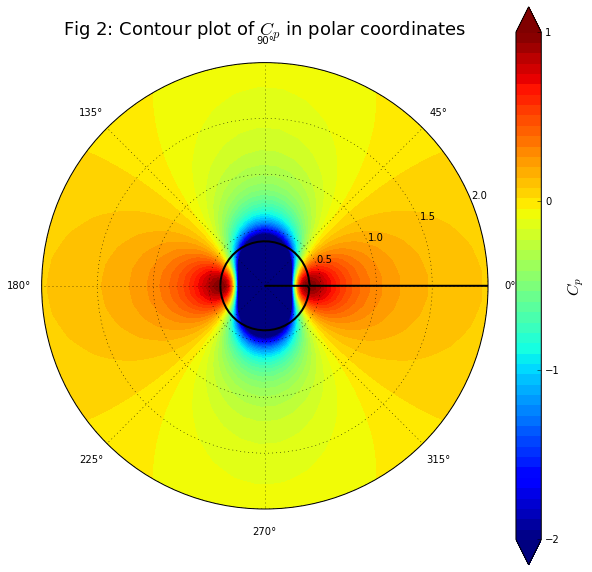

In [271]:
fig, ax = pyplot.subplots(subplot_kw=dict(projection='polar'))
ax.figure.set_figheight(10); ax.figure.set_figwidth(10)
contf = ax.contourf(theta, r, Cp, levels = numpy.linspace(-2, 1.0, 50), extend='both')
ax.contour(theta, r, psi, levels=[0.], colors='#000000', linewidths=2, linestyles='solid')

cbar = ax.figure.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

ax.set_title('Fig 2: Contour plot of $C_{p}$ in polar coordinates', fontsize=18)

## <i><u> P2 (c): Comparison of $C_{p}$ extracted from superposition and computed using formula </u></i>

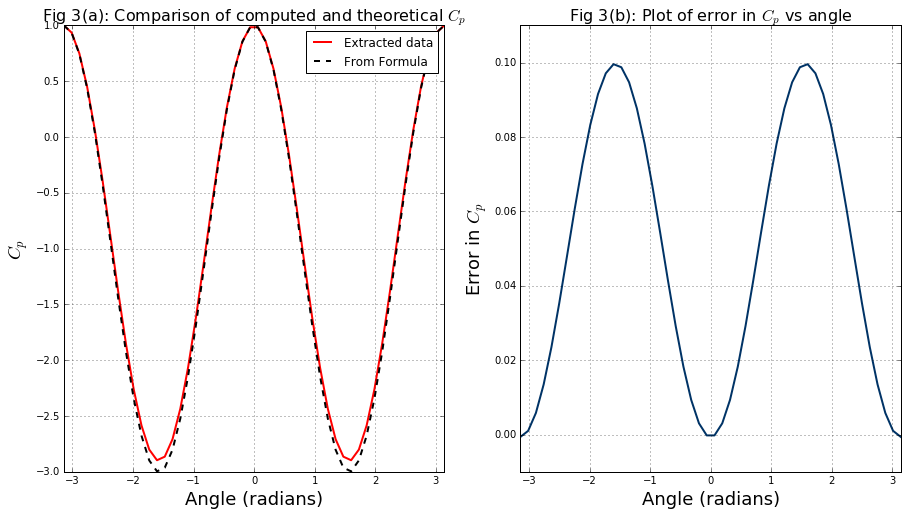

In [272]:
Cp1 = Cp[:,loc_min]; Cp2 = 1.0 - 4.0*(numpy.sin(theta[:,loc_min]))**2;
Cp_err = (Cp1-Cp2)

pyplot.figure(figsize=(15,8))

pyplot.subplot(121)
pyplot.grid(True)
pyplot.xlim(-1.0*math.pi, math.pi)
pyplot.ylim(-3.0, 1.0)
pyplot.xlabel('Angle (radians)', fontsize=18)
pyplot.ylabel('$C_{p}$', fontsize=18)
pyplot.plot(theta[:,loc_min], Cp1, color = '#FF0000', ls='-', lw=2, label = 'Extracted data')
pyplot.plot(theta[:,loc_min], Cp2, color = '#000000', ls='--',lw=2, label = 'From Formula')
pyplot.title('Fig 3(a): Comparison of computed and theoretical $C_{p}$', fontsize=16);
pyplot.legend(loc= 'upper right')

pyplot.subplot(122)
pyplot.plot(theta[:,loc_min], Cp_err, color = '#003366', ls='-', lw=2)
pyplot.xlim(-1.0*math.pi, math.pi)
pyplot.ylim(-0.01, 0.11)
pyplot.grid(True)
pyplot.xlabel('Angle (radians)', fontsize=18)
pyplot.ylabel('Error in $C_{p}$', fontsize=18)
pyplot.title('Fig 3(b): Plot of error in $C_{p}$ vs angle', fontsize=16);

From the above graph, we see that the values of $C_{p}$, extracted from superposition of elementary flows agree well with those computed using the formula (Fig 3(a)). The maximum error in $C_{p}$ is around 0.1 at $\theta = \pm \frac{\pi}{2}$, resulting in relative absolute error of 3.33%.

<hr>